# Perkenalan

Saat ini banyak orang yang lebih memilih menggunakan jasa transportasi online karena dapat mengurangi kesibukan yang menghabiskan waktu dan seseorang dapat memanfaatkan waktu tersebut untuk melakukan hal lain. Hal itulah yang melatarbelakangi terbentuknya Dataset Uber dan Lyft. Uber dan Lyft adalah platform yang menawarkan layanan transportasi melalui aplikasi seluler. Uber adalah perusahaan global yang tersedia di 69 negara dan sekitar 900 kota di seluruh dunia, sementara Lyft tersedia di sekitar 644 kota di Amerika Serikat dan 12 kota di Kanada. Namun Lyft merupakan perusahaan transportasi online terbesar kedua dengan pangsa pasar 31% di AS. Pada kedua aplikasi tersebut, harga yang ditawarkan selalu berubah. Berdasarkan hal tersebut diperlukan analisis untuk mengetahui faktor-faktor yang mempengaruhi harga dan memprediksinya dengan menggunakan regresi linier. Oleh karena itu, kami menggunakan dataset dari Kaggle yang berisi informasi dari aplikasi Uber dan Lyft di negara Amerika Serikat dan di kota New York. Dataset memiliki 693071 baris dan 57 kolom, dataset ini diambil dari https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

Import Pustaka Yang Digunakan dalam Analisis Dataset Uber vs lyft.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

# Data Loading

Data Loading Mengimport Dataset "rideshare_kaggle.csv" sebagai pd


In [2]:
data = pd.read_csv("rideshare_kaggle.csv")
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Menampilkan Bentuk Dataset yang terdiri dari 3930 Baris dan 57 Kolom

In [3]:
data.shape

(693071, 57)

Menampilkan Jumlah beserta Nama colom dataset

In [4]:
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

Menampilkan Jumlah Unique value atau kardinalitas dari masing-masing Kolom

In [5]:
data.nunique(axis=0)

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

Memberi deskripsi dasar atas Dataset

In [6]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,693071.000000,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,1544045709.755097,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1544043966.242997,33.457774,1544041609.570159,45.261313,1544047300.031310,29.731002,1544048034.740452,41.997343,1544047993.949826
std,689192.492586,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,691202.767271,6.467224,690195.441406,5.645046,690135.337190,7.110494,687186.191495,6.936841,691077.651976
min,1543203646.000000,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1543161600.000000,15.630000,1543122000.000000,33.510000,1543154400.000000,11.810000,1543136400.000000,28.950000,1543186800.000000
25%,1543443968.000000,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1543420800.000000,30.170000,1543399200.000000,42.570000,1543438800.000000,27.760000,1543399200.000000,36.570000,1543438800.000000
50%,1543737478.000000,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1543770000.000000,34.240000,1543726800.000000,44.680000,1543788000.000000,30.130000,1543744800.000000,40.950000,1543788000.000000
75%,1544827509.000000,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1544806800.000000,38.880000,1544788800.000000,46.910000,1544814000.000000,35.710000,1544788800.000000,44.120000,1544817600.000000
max,1545160511.000000,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1545152400.000000,43.100000,1545192000.000000,57.870000,1545109200.000000,40.050000,1545134400.000000,57.200000,1545109200.000000


Menampikan info tipe data dan jumlah value bukan NaN

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Melakukan check apabila terdapat data duplikat

In [8]:
data.duplicated().sum()

0

### Mengambil Keputusan Pembuatan Model

Berdasarkan Atribut yang ada di dalam Dataset, saya memutuskan untuk membuat sebuah model Machine Learning Linear Regression untuk melakukan prediksi harga/biaya menaiki taksi online uber atau lyft berdasarkan jarak, tempat penemputan, tujuan, dan tanggal serta jam menaiki taksi online uber atau lyft.


# Data Cleaning

Menampilkan jumlah kolom yang memuat Missing Data dan berapa persen dari keseluruhan Dataset

In [9]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data.head()

,total,percent
price,55095,0.079494
id,0,0.000000
ozone,0,0.000000
temperatureLowTime,0,0.000000
apparentTemperatureHigh,0,0.000000


Menghapus beberapa kolom sebagai berikut :

* Id: memuat record yang bersifat unique.
* Datetime, Timestamp: tidak diperlukan karena ada atribut hour,day, month.
* Timezone: zona waktu dalam dataset hanya satu
* Product_id: menghapus product_id karena menimbang adanya atribut name
* Semua Atribut yang berkaitan dengan Cuaca, karena model yang akan dibuat tidak menggunakan parameter cuaca dalam membuat prediksi
* longitude and latitude: tidak diperlukan karena atribut tujuan sudah ada

In [10]:
data = data.drop(['id', 'datetime', 'timezone', 'timestamp','latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',"product_id",
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'], axis=1)

Menghapus Baris yang memiliki NaN Values

In [11]:
data = data.dropna()
data.price.isnull().sum()

0

Menampilkan kolom yang tersisa setelah Pembersihan data

In [12]:
data.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name',
       'price', 'distance', 'surge_multiplier'],
      dtype='object')

Sekarang Dataset hanya memiliki 10 Atribut yang digunakan dalam membuat model linear regression

# Explorasi Data

Visualisasi atribut dari dataset dalam bentuk histogram.

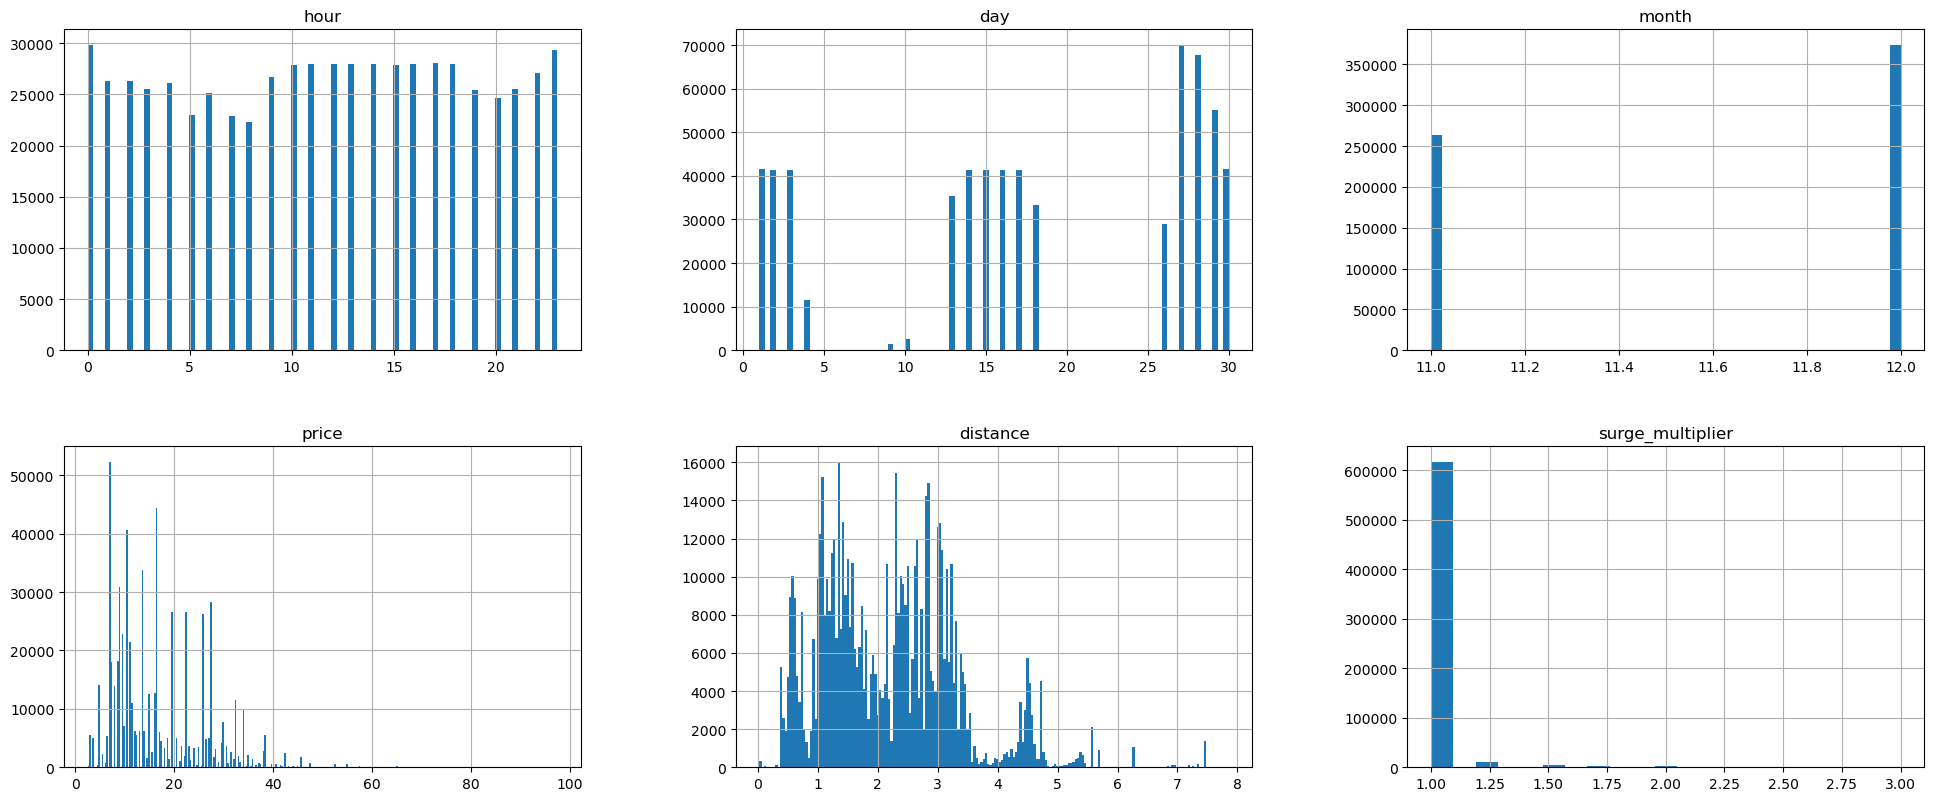

In [13]:
data.hist(bins='auto', layout=(15,3), figsize=(24,80));

In [14]:
#Menampilkan Data yang Bersifat Kategorikal atau non Numeric
data_categorical = data[['source', 'destination', 'cab_type', 'name']]
data_categorical.describe()

,source,destination,cab_type,name
count,637976,637976,637976,637976
unique,12,12,2,12
top,Financial District,Financial District,Uber,UberXL
freq,54197,54192,330568,55096


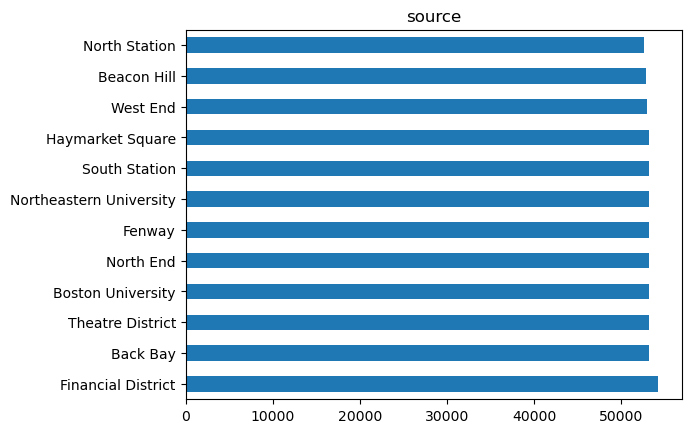

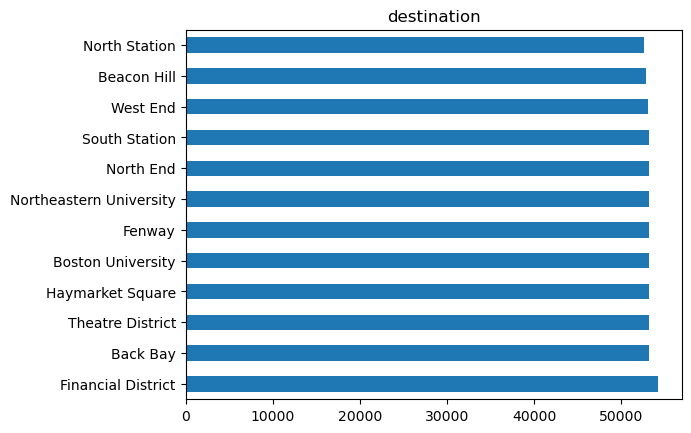

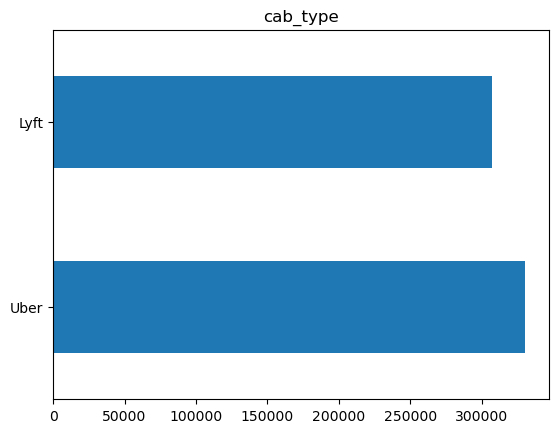

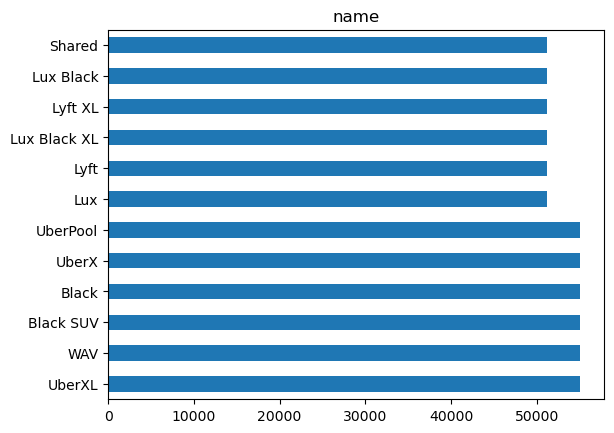

In [15]:
#Memvisualisasi atribut non Numerik dataset dalam bentuk Bar chart
for column in data_categorical.columns:
    data_categorical[column].value_counts().plot(kind='barh')
    plt.title(column)
    plt.show()

Berdasarkan Chart Cab-Type dapat diambil informasi bahwa layanan Uber lebih populer dan banyak digunakan daripada Lyft dan nama atau tipe layanan yang paling banyak dipesan adalah Black SUV untuk layanan Uber, dan Luc Black XL untuk layanan Lyft.

Sedangkan dari kedua layanan tersebut Titik penjemputan dan lokasi tujuan yang memiliki jumlah pemesanan yang paling banyak adalah Financial District, hal ini disebabkan oleh penggunaan kadua layanan taksi online kebanyakan digunakan sebagai sarana transportasi para pekerja yang bekerja di Financial District sehingga menjadi tempat penjemputan sekaligus lokasi tujuan paling banyak.

Menampilkan Hubungan anatara pasangan Variabel berdasarkan Seluruh entri data untuk membandingkan uber dan lyft menggunakan scatter plot, dan dalam variabel yang sama akan menampilkan perkiraan distribusi antara lyft dan uber dalam setiap variabel

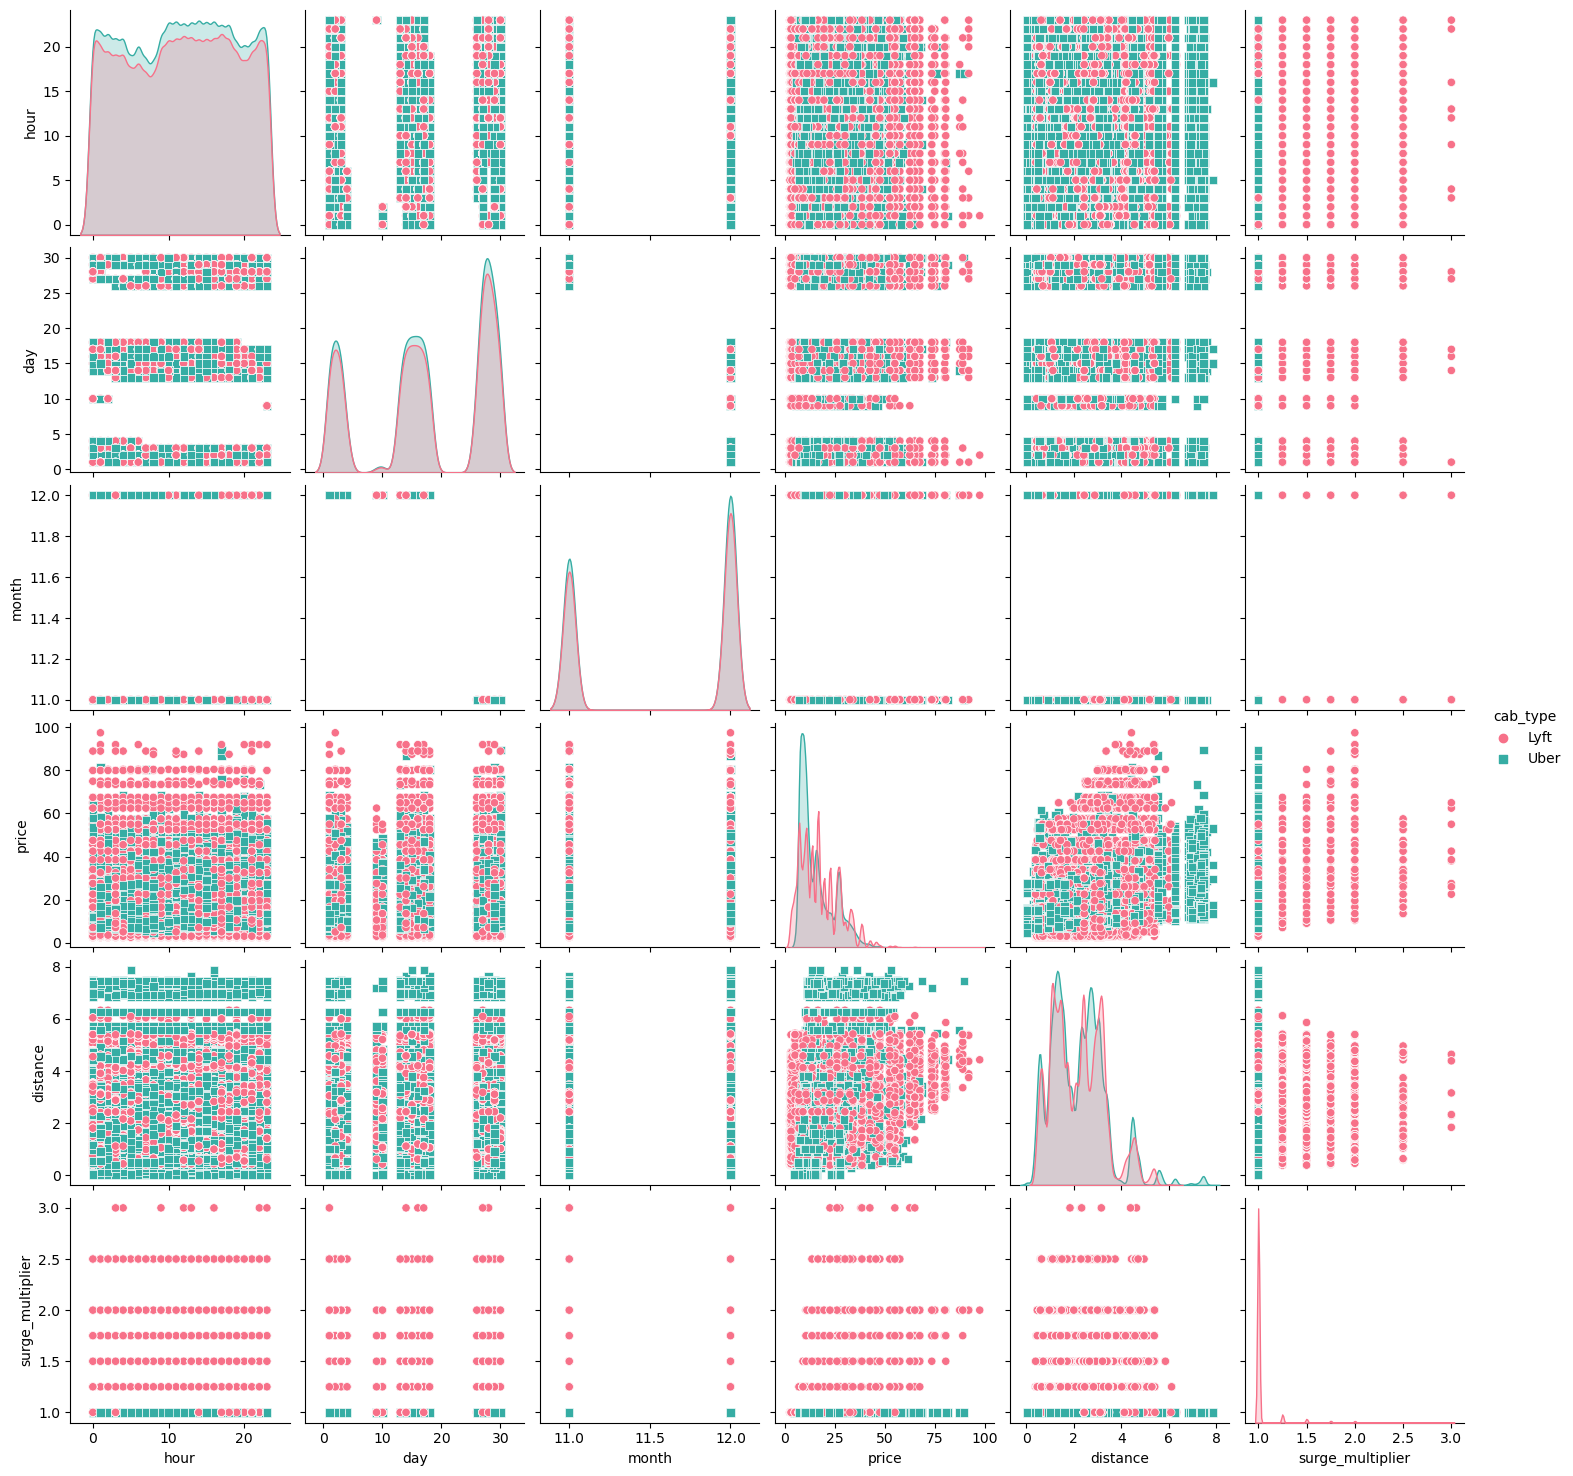

In [16]:
sns_pairplot=sns.pairplot(data, hue="cab_type", markers=["o","s"],diag_kind="kde",kind="scatter",palette="husl")

Berdasarkan beberapa visual diatas, diambil kesimpulan harga dari layanan lyft umumnya lebih mahal secara garis besar dengan atau tanpa pengaruh fitur lain, selain itu hanya layanan lyft yang memiliki surge_multiplier yang merupakan fitur untuk mendapatkan taksi lebih cepat dengan membayar lebih pada saat jam sibuk.

Menampilkan Hubungan antara variabel price dan Hours menggunakan Bar Chart, serta melakukan deteksi terhadap nilai outlier dari fitur dataset

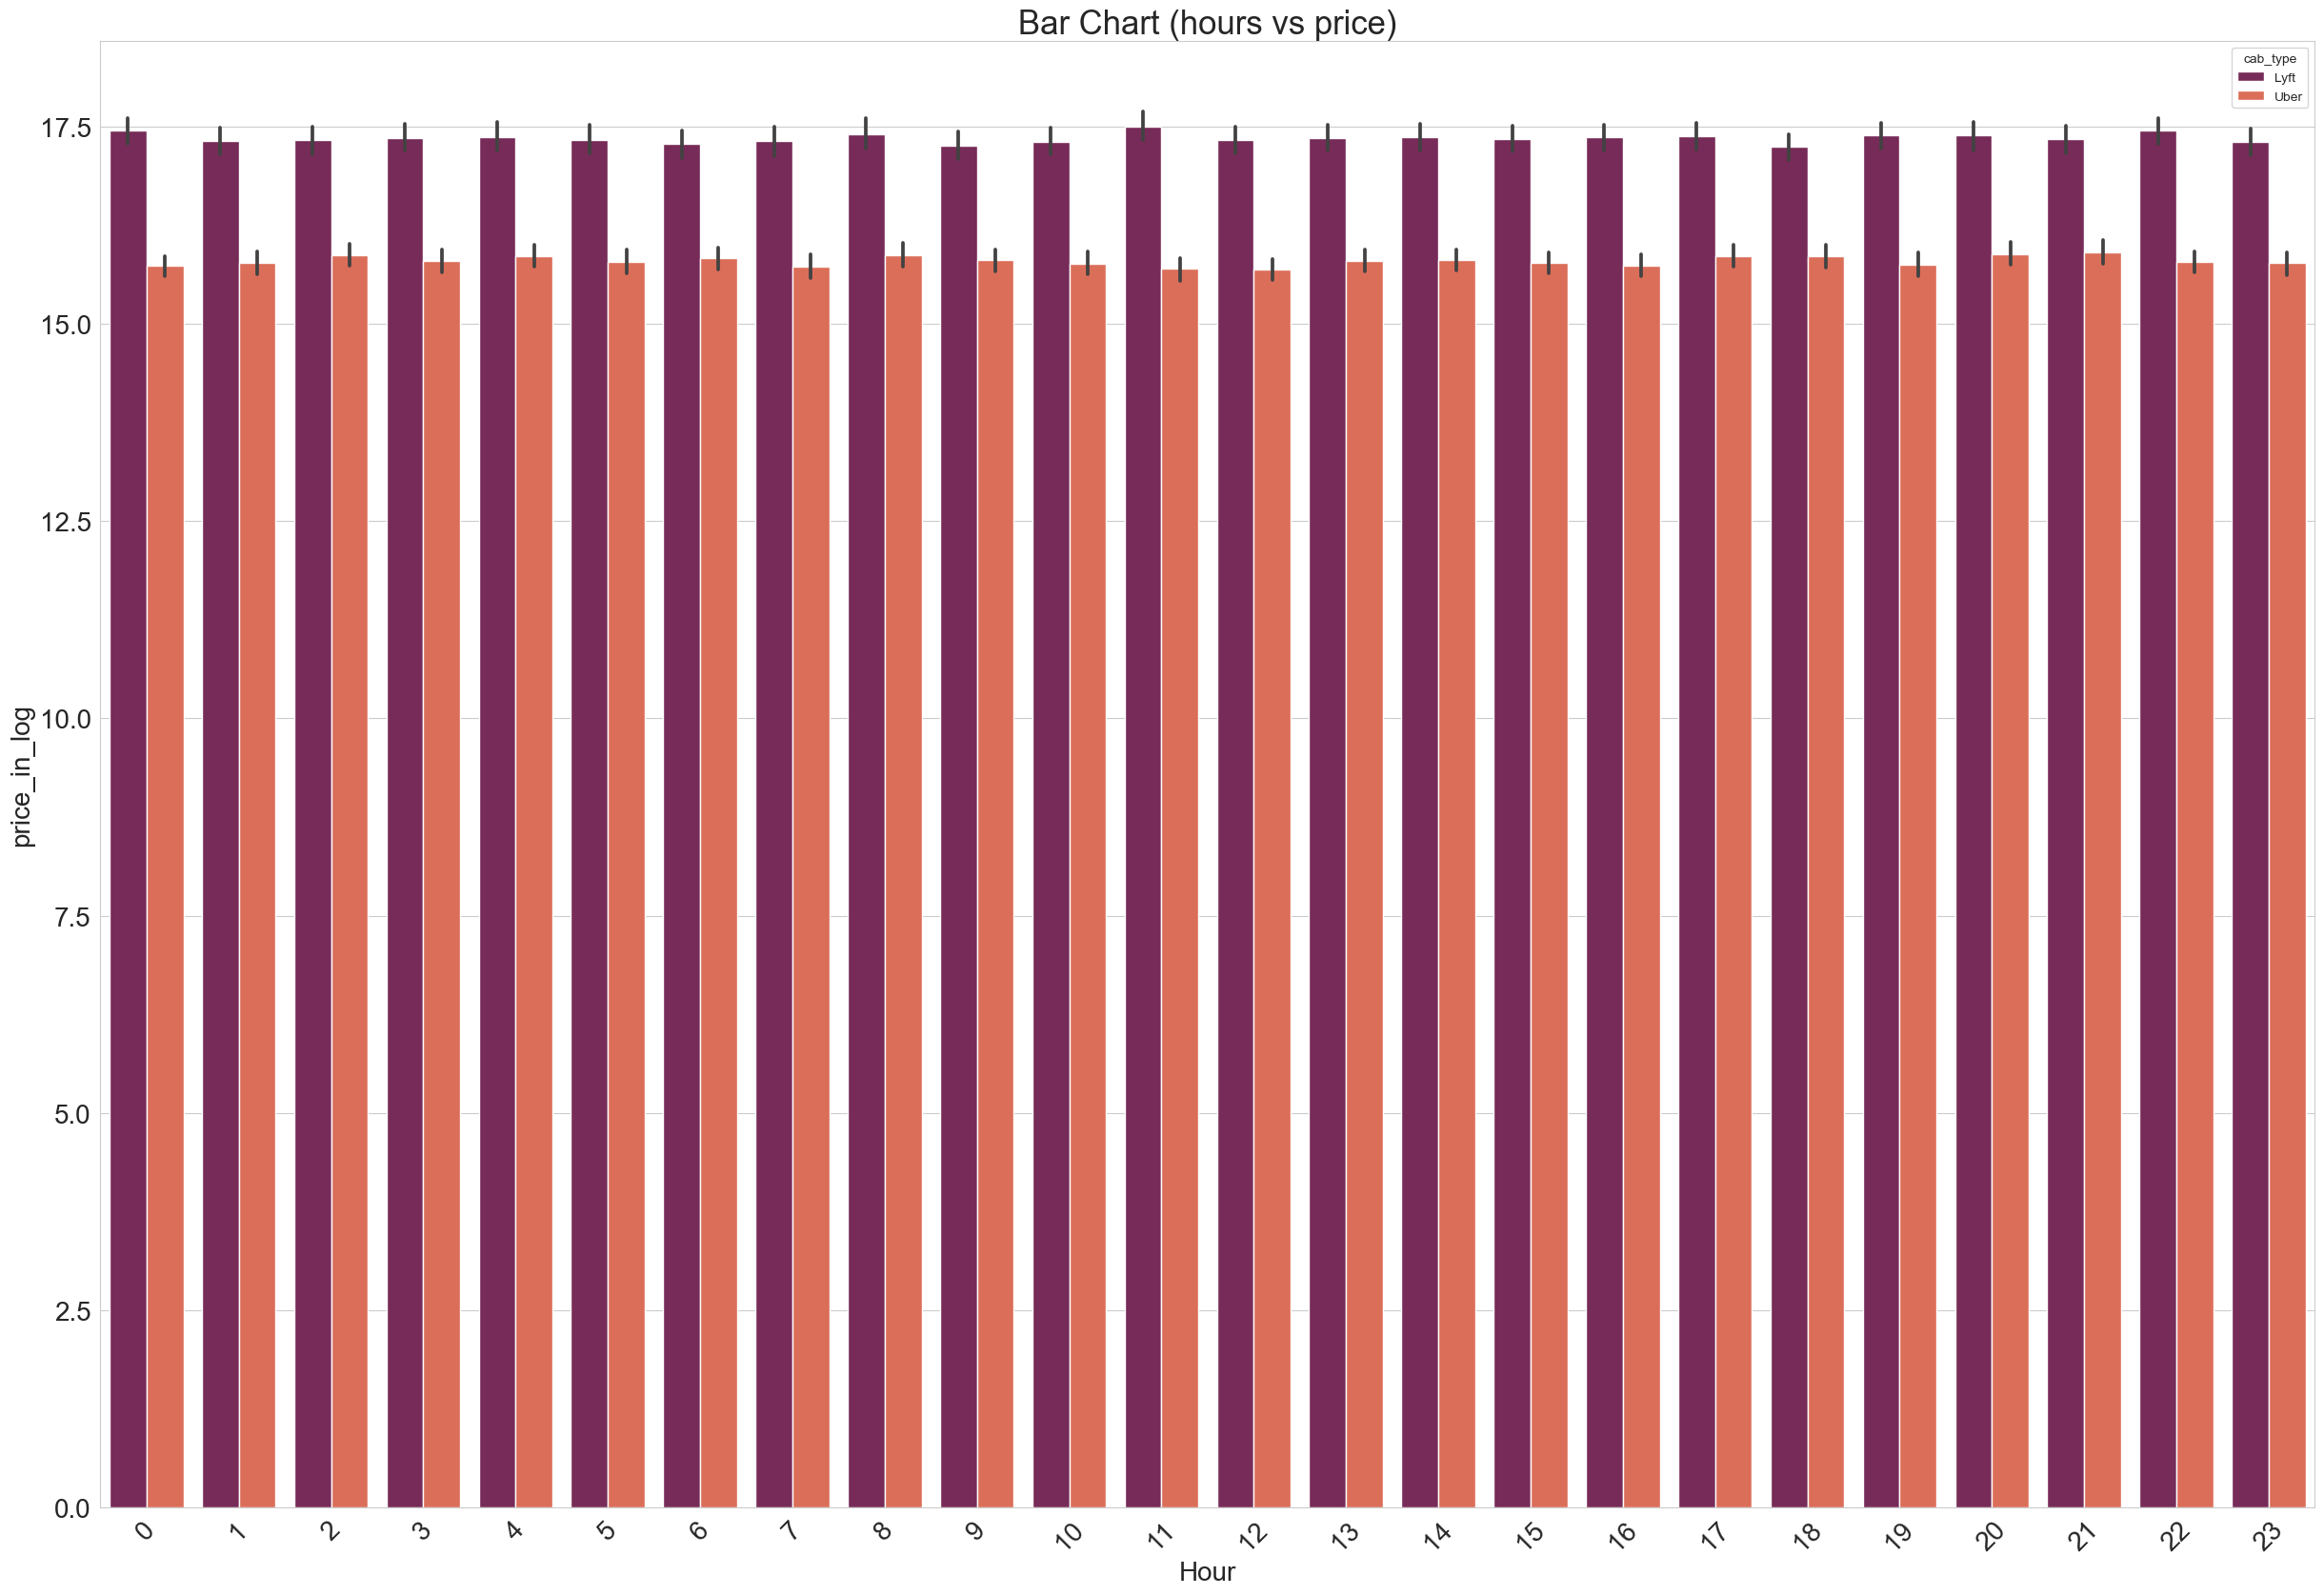

In [17]:
plt.figure(figsize=(30, 20))
sns.set_style("whitegrid")
sns.barplot(x="hour", y="price", data=data, hue="cab_type", palette="rocket")
plt.xticks(fontsize=20, rotation=45)  # Menambahkan rotasi pada label sumbu x agar lebih mudah dibaca
plt.yticks(fontsize=20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("price_in_log", fontsize=20)
plt.title("Bar Chart (hours vs price)", fontsize=25)
plt.show()

Berdasarkan bar chart diatas dapat disimpulkan bahwa rata-rata harga dari layanan taksi online lyft lebih mahal dari layanan Uber.

Menghapus baris yang merupakan outlier

In [18]:
quantiles = stats.mstats.mquantiles(data["price"] , prob=[0.25,0.75])
IQR= stats.iqr(data["price"])
upper = quantiles[1]+(1.5*IQR)
lower = quantiles[0]-(1.5*IQR)
data.loc[data["price"]>upper,"price"]= np.nan
data.loc[data["price"]<lower,"price"]= np.nan
data.price.isnull().sum()

5589

In [19]:
for i in ["price"]:
    data.loc[data.loc[:,i].isnull(),i] = data.loc[:,i].mean()
data.price.isnull().sum()

0

Menampilkan korelasi antara variabel price dengan variabel lain Menggunakan Heatmap.

C:\Users\Alfar\AppData\Local\Temp\ipykernel_6672\711922082.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<Axes: title={'center': 'Uber and Lyft Heat Map'}>

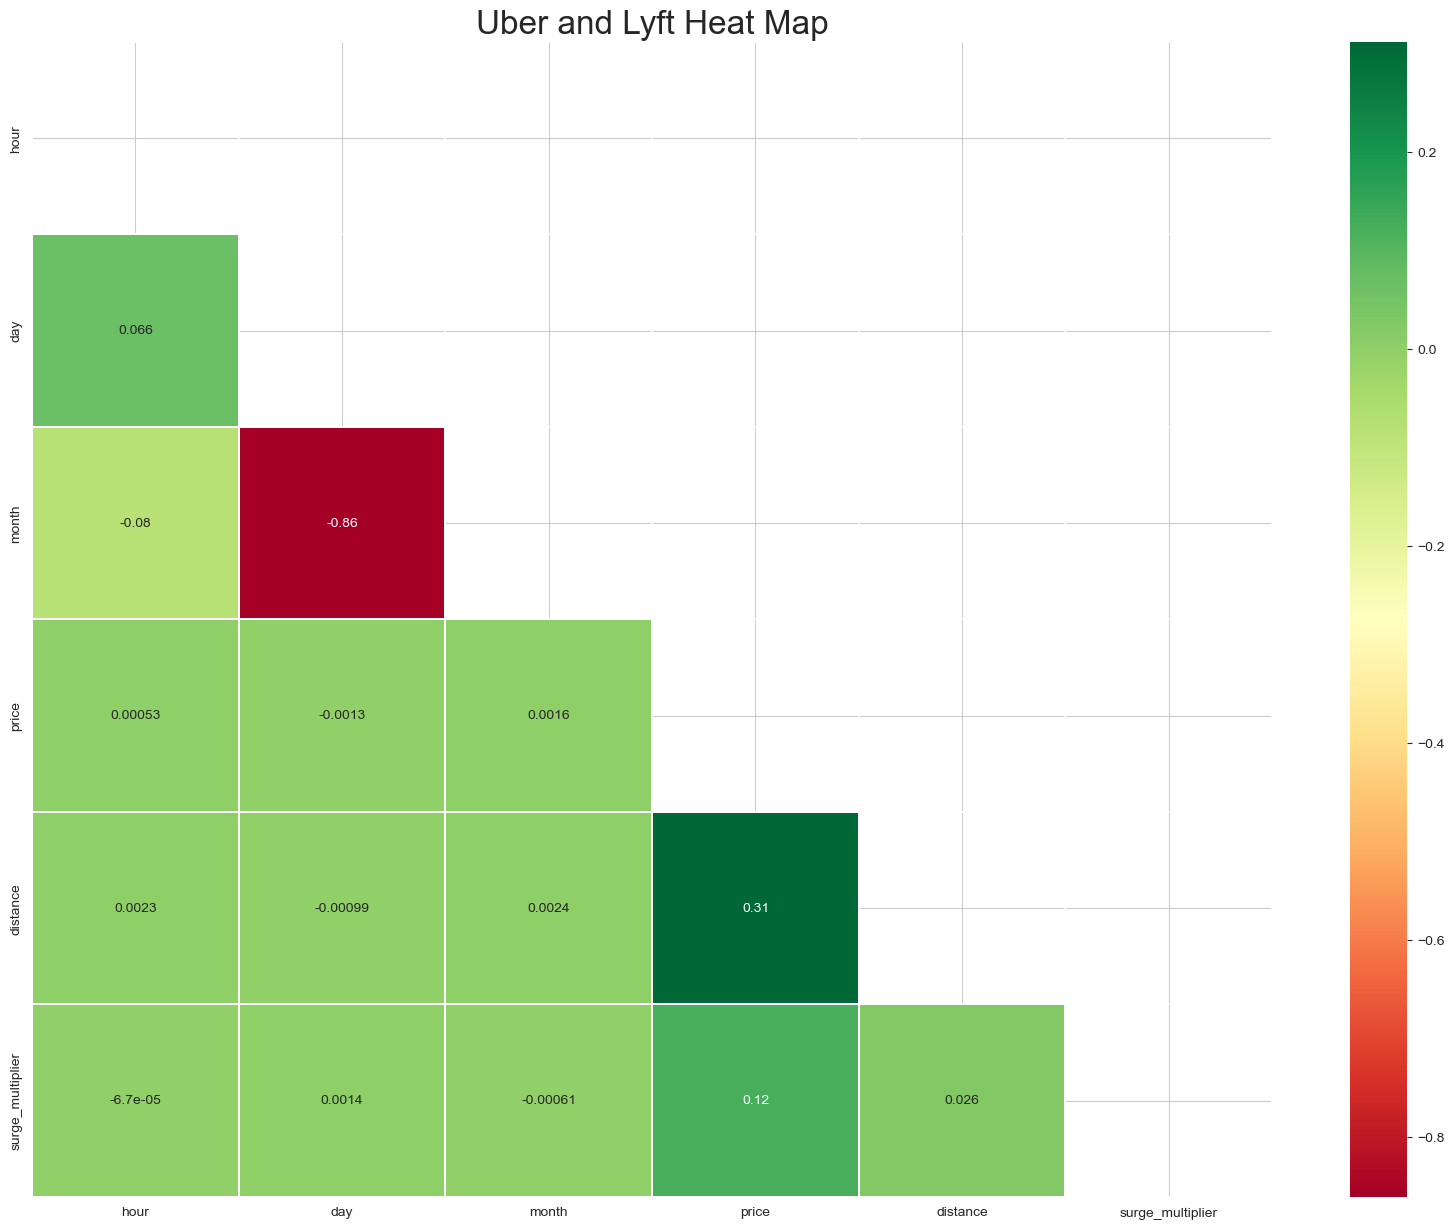

In [20]:
corrmat = data.corr()

fig, ax = plt.subplots(figsize=(20,15))
title = "Uber and Lyft Heat Map"
plt.title(title,fontsize=24)
ttl = ax.title
ttl.set_position([0.5,1.05])
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat,mask=mask,annot=True,cmap='RdYlGn',linewidths=0.20,ax=ax)

Atribut Month memiliki korelasi yang tinggi karena dataset hanya memuat kardinalitas 2 bulan, sedangkan atribut lain memiliki korelasi yang cukup merata.

# Data Preproccessing

Memisahkan Atribut numerik dan non-numerik

In [21]:
categorical_cols=data.columns[data.dtypes =='object']
print(categorical_cols)
len(categorical_cols)

Index(['source', 'destination', 'cab_type', 'name'], dtype='object')


4

In [22]:
for i in categorical_cols:
  print(data[i].value_counts())

Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: source, dtype: int64
Financial District         54192
Back Bay                   53190
Theatre District           53189
Haymarket Square           53171
Boston University          53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                   52992
Beacon Hill                52840
North Station              52577
Name: destination, dtype: int64
Uber    330568
Lyft    307408
Name: cab_type, dtype: int64
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Ub

In [23]:
numeric_cols=data._get_numeric_data().columns
print(numeric_cols)

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier'], dtype='object')


Membuat Transformer untuk mengubah atribut non-numerik menjadi numerik dan membuat dataframe baru yang semua atributnya berupa numerik.

In [24]:
ohe=OneHotEncoder()
data_encode_col = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray(),columns=["encoded_" + x for x in ohe.get_feature_names_out(categorical_cols)])
data_encode_col.head()
data_other_cols = data.drop(columns=categorical_cols)
data = pd.concat([data_encode_col, data_other_cols], axis=1)

Melakukan Standarisasi terhadap Data sebelum melakukan pendefinisian Model regresi linear.

In [25]:
scaler= StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [26]:
data.head()

,encoded_source_Back Bay,encoded_source_Beacon Hill,encoded_source_Boston University,encoded_source_Fenway,encoded_source_Financial District,encoded_source_Haymarket Square,encoded_source_North End,encoded_source_North Station,encoded_source_Northeastern University,encoded_source_South Station,...,encoded_name_UberPool,encoded_name_UberX,encoded_name_UberXL,encoded_name_WAV,hour,day,month,price,distance,surge_multiplier
0,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,3.317226,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.307432,-0.307441,-0.307447,-0.307447,-0.376833,-0.180090,0.839574,-1.287971,-1.54064,-0.157905
1,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,3.317226,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.307432,-0.307441,-0.307447,-0.307447,-1.384206,0.921885,-1.191081,-0.600767,-1.54064,-0.157905
2,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,3.317226,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.307432,-0.307441,-0.307447,-0.307447,-1.528116,1.022065,-1.191081,-1.058903,-1.54064,-0.157905
3,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,3.317226,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.307432,-0.307441,-0.307447,-0.307447,-1.096385,1.222424,-1.191081,1.117243,-1.54064,-0.157905
4,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,3.317226,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.307432,-0.307441,-0.307447,-0.307447,-1.240295,1.122244,-1.191081,-0.829835,-1.54064,-0.157905


In [27]:
data = data.dropna()
data.shape

(587333, 44)

# Pendefinisian Model

Memisahkan sebagian kecil (100) dataset untuk digunakan dalam inferensi model dan mengevaluasi kinerja nantinya.

In [28]:
data_test = data.iloc[-100:]
data = data.iloc[:-100]

Memisahkan data menjadi data training dan data testing serta mendefinisikan base model linear regression.

In [29]:
X=data.drop(['price'],axis=1)
y=data['price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [31]:
model = LinearRegression()

# Pelatihan Model

Melakukan training model menggunakan data training

In [32]:
model.fit(X_train, y_train)

LinearRegression()

Melakukan fitting data testing kedalam model.

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred[0:5]

array([ 0.32189841,  0.01872288, -0.27517292, -0.29096661, -0.15808914])

# Evaluasi Model

Melakukan evaluasi dari hasil prediksi model menggunakan R2 score, MAE, dan RMSE

In [35]:
def evaluate_model(test,pred):
    #print(test,pred)
    print("R^2:", r2_score(test, pred))
    print("MAE:", mean_absolute_error(test,pred))
    print("RMSE:",np.sqrt(mean_squared_error(test, pred)))
    print("")

In [36]:
evaluate_model(y_test,y_pred)

R^2: 0.10971745610764094
MAE: 0.7816235643312254
RMSE: 0.9426998638902582



Melakukan visualisasi perbadingan hasil prediksi y dan nilai y sebenarnya menggunakan Scatter plot.

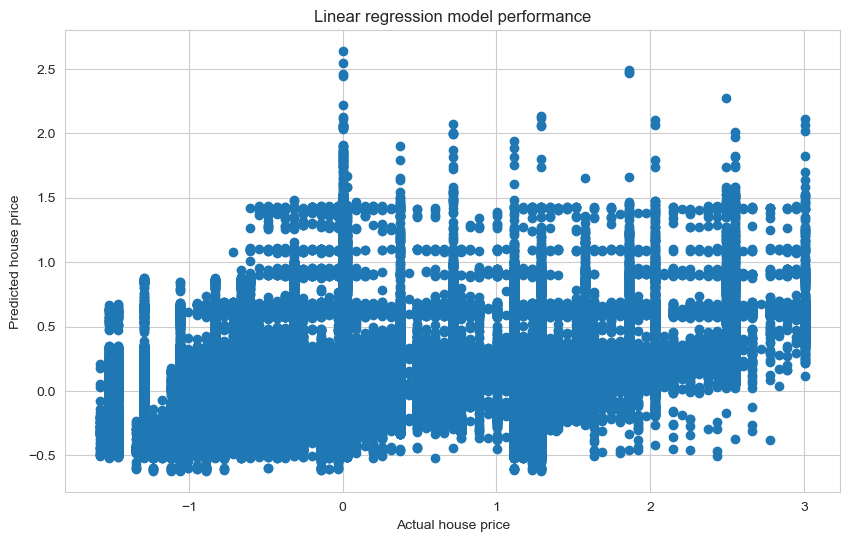

In [37]:
# Visualisasi hasil prediksi model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual house price")
plt.ylabel("Predicted house price")
plt.title("Linear regression model performance")
plt.grid(True)
plt.show()

# Model Inference

data test dari data train yang dipisah sebelumnya tidak masuk kedalam pelatihan model maka data ini belum terlihat sebelumnya, oleh karena itu dilakukan evaluasi kinerja dan inferensi menggunakan 100 entri data terakhir dari dataset awal yang sudah dipisahkan


In [38]:
#data ini bisa menjadi data dummy
data_test.head()

,encoded_source_Back Bay,encoded_source_Beacon Hill,encoded_source_Boston University,encoded_source_Fenway,encoded_source_Financial District,encoded_source_Haymarket Square,encoded_source_North End,encoded_source_North Station,encoded_source_Northeastern University,encoded_source_South Station,...,encoded_name_UberPool,encoded_name_UberX,encoded_name_UberXL,encoded_name_WAV,hour,day,month,price,distance,surge_multiplier
637862,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,3.316647,-0.301497,...,-0.307432,-0.307441,-0.307447,-0.307447,0.054898,-1.682784,0.839574,-8.298348e-01,2.713322,-0.157905
637863,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,3.316647,-0.301497,...,-0.307432,-0.307441,-0.307447,-0.307447,0.054898,-1.682784,0.839574,4.069065e-16,2.713322,-0.157905
637864,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,3.316647,-0.301497,...,-0.307432,-0.307441,-0.307447,-0.307447,0.630539,0.921885,-1.191081,2.491651e+00,2.713322,-0.157905
637865,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,3.316647,-0.301497,...,-0.307432,-0.307441,-0.307447,-0.307447,0.630539,0.921885,-1.191081,1.575379e+00,2.713322,-0.157905
637866,-0.301624,-0.300509,3.316375,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.307432,-0.307441,-0.307447,-0.307447,0.630539,0.921885,-1.191081,-3.144318e-01,2.713322,-0.157905


membuat data testing baru

In [39]:
X_baru = data_test.drop(['price'],axis=1)
y_baru  = data_test['price']

In [40]:
X_baru

,encoded_source_Back Bay,encoded_source_Beacon Hill,encoded_source_Boston University,encoded_source_Fenway,encoded_source_Financial District,encoded_source_Haymarket Square,encoded_source_North End,encoded_source_North Station,encoded_source_Northeastern University,encoded_source_South Station,...,encoded_name_Shared,encoded_name_UberPool,encoded_name_UberX,encoded_name_UberXL,encoded_name_WAV,hour,day,month,distance,surge_multiplier
637862,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,3.316647,-0.301497,...,3.384146,-0.307432,-0.307441,-0.307447,-0.307447,0.054898,-1.682784,0.839574,2.713322,-0.157905
637863,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,3.316647,-0.301497,...,-0.295496,-0.307432,-0.307441,-0.307447,-0.307447,0.054898,-1.682784,0.839574,2.713322,-0.157905
637864,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,3.316647,-0.301497,...,-0.295496,-0.307432,-0.307441,-0.307447,-0.307447,0.630539,0.921885,-1.191081,2.713322,-0.157905
637865,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,3.316647,-0.301497,...,-0.295496,-0.307432,-0.307441,-0.307447,-0.307447,0.630539,0.921885,-1.191081,2.713322,-0.157905
637866,-0.301624,-0.300509,3.316375,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.295496,-0.307432,-0.307441,-0.307447,-0.307447,0.630539,0.921885,-1.191081,2.713322,-0.157905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.295496,-0.307432,-0.307441,-0.307447,3.252592,1.494001,-0.480629,0.839574,0.238450,-0.157905
637972,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.295496,-0.307432,-0.307441,3.252592,-0.307447,1.494001,-0.480629,0.839574,0.238450,-0.157905
637973,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.295496,-0.307432,3.252656,-0.307447,-0.307447,1.494001,-0.480629,0.839574,0.423405,-0.157905
637974,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,-0.301457,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.295496,-0.307432,-0.307441,-0.307447,-0.307447,1.494001,-0.480629,0.839574,0.423405,-0.157905


Melakukan fitting data testing baru kedalam model

In [41]:
y_pred_baru = model.predict(X_baru)

Evaluasi hasil prediksi model menggunakan data testing yang baru

In [42]:
evaluate_model(y_baru,y_pred_baru)

R^2: 0.051565649238728306
MAE: 0.7951450267147737
RMSE: 0.9313274551664777



Nilai RMSE dan metriks lain yang ditampilkan sebagai skor dari model regresi yang dibuat relatif bernilai kecil sehingga model yang dibuat dapat dikatakan cukup akurat dalam membuat prediksi harga.

# Pengambilan Kesimpulan

Kesimpulan dari pembuatan model linear regression dari dataset ini adalah bahwa secara keseluruhan, banyak atribut yang kurang berguna dalam melakukan estimasi price dari taksi online uber maupun lyft, hanya ada beberapa atribut yang berguna untuk melakukan estimasi harga.

saya memilih 10 atribut yang saya rasa paling berguna untuk melakukan prediksi harga berdasarkan jarak dan waktu menaiki taksi dengan menggunakan model linear regression, hasil dari pembuatan model ini ternyata cukup sukses karena berhasil dalam melakukan prediksi fare price dengan tingkat RMSE yang relatif kecil